# kNN的基础实现
## 1.准备用py导入数据

In [1]:
from numpy import *
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0],[0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()
xs = []
ys = []
for x, y in group:
    xs.append(x)
    ys.append(y)
print(xs)
print(ys)

[1.0, 1.0, 0.0, 0.0]
[1.1, 1.0, 0.0, 0.1]


## 2.数据点信息分析

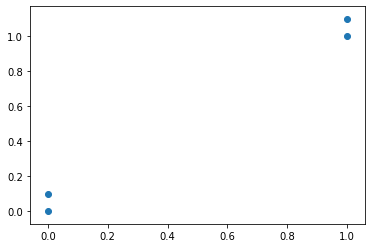

In [4]:
plt.scatter(xs, ys)

## 3.kNN算法实现
### 伪代码

    1.计算当前点对数据集中所有点之间的距离
    2.将所得距离递增排序
    3.选距离最小的前k个点
    4.对前k个点的类别进行计数
    5.选择最大的计数的类别作为分类结果

### tip：提供两种计算向量间距离的思路
#### 1.矩阵整体预算
* 将当前向量扩展成与已知数据集矩阵同样大小的矩阵后做矩阵的运算，一步到位

In [5]:
inX = [0,0]
dataset_size = group.shape[0]
diff_mat = tile(inX, (dataset_size, 1)) - group
sq_diff_mat = diff_mat ** 2
print('矩阵减法：')
print(diff_mat)
print('矩阵乘法：')
print(sq_diff_mat)

矩阵减法：
[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
矩阵乘法：
[[1.   1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]


In [6]:
sq_dist = sq_diff_mat.sum(axis=1)
dist_1 = sq_dist ** 0.5
print('距离')
print(dist_1)

距离
[1.48660687 1.41421356 0.         0.1       ]


#### 2.向量间的单独运算
* 将数据集中的向量单独抽出运算

In [7]:
def dist_mean(vecA, vecB):
    return sqrt(sum(power((vecA - vecB), 2)))


dist = zeros(dataset_size)
for i in range(dataset_size):
    dist[i] = dist_mean(group[i, :], inX)
print('距离')
print(dist)

距离
[1.48660687 1.41421356 0.         0.1       ]


In [8]:
sort_dist = dist.argsort()
class_count = {}
print(sort_dist)

[2 3 1 0]


In [9]:
for i in range(3):
    vote = labels[sort_dist[i]]
    class_count[vote] = class_count.get(vote, 0) + 1
print(class_count)

{'B': 2, 'A': 1}


In [10]:
sort_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
print(sort_class_count)

[('B', 2), ('A', 1)]


In [11]:
result = sort_class_count[0][0]
print(result)

B


### kNN算法整合

In [12]:
def kNN(curdata, dataset, label, k):
    dist = zeros(dataset.shape[0])
    class_count = {}
    for i in range(dataset.shape[0]):
        dist[i] = dist_mean(curdata, dataset[i, :])
    sorted_dist = dist.argsort()
    for j in range(k):
        index = sorted_dist[j]
        class_name = label[index]
        class_count[class_name] = class_count.get(class_name, 0) + 1
    sort_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sort_class_count[0][0]
kNN(inX, group, labels, 3)

'B'

## 案例：使用kNN算法改进约会网站的配对效果
### Step 1：收集数据，准备数据
* 将文本记录转换为Numpy

In [13]:
from numpy import *
def file_to_mat(file_name):
    fr = open(file_name)
    all_line = fr.readlines()
    line_count = len(all_line)
    dataset = zeros((line_count, 3))
    label = []
    index = 0
    for line in all_line:
        line = line.strip().split('\t')
        # 把前三列的值赋给dataset
        dataset[index, :] = line[0:3]
        # 把最后一列的标志赋给label
        label.append(int(line[-1]))
        index += 1
    print(dataset)
    print(label[0:20])
    return dataset, label

In [14]:
dataset, label = file_to_mat(r'datingTestSet2.txt')

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


### Step 2：分析数据
* 使用matplotlib画图分析数据

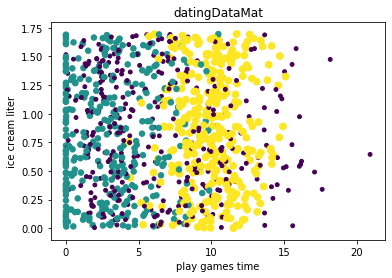

In [15]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
pic = fig.add_subplot(111)
plt.title("datingDataMat") 
plt.xlabel(r'play games time') 
plt.ylabel(r'ice cream liter') 
pic.scatter(dataset[:, 1], dataset[:, 2], 15.0*array(label), array(label))

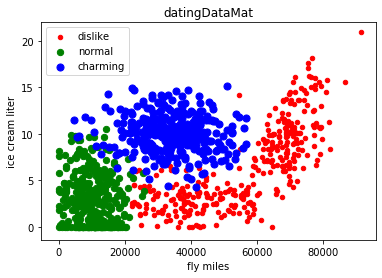

In [16]:
fig = plt.figure()
img = fig.add_subplot(111)
plt.title("datingDataMat") 
plt.xlabel(r'fly miles') 
plt.ylabel(r'ice cream liter') 
type1_x = []
type1_y = []
type2_x = []
type2_y = []
type3_x = []
type3_y = []
for i in range(len(label)):
    if label[i] == 1:
        type1_x.append(dataset[i, 0])
        type1_y.append(dataset[i, 1])
    if label[i] == 2:
        type2_x.append(dataset[i, 0])
        type2_y.append(dataset[i, 1])
    if label[i] == 3:
        type3_x.append(dataset[i, 0])
        type3_y.append(dataset[i, 1])
type1 = img.scatter(type1_x, type1_y, s=20, c='red')
type2 = img.scatter(type2_x, type2_y, s=40, c='green')
type3 = img.scatter(type3_x, type3_y, s=50, c='blue')
img.legend((type1, type2, type3), (u'dislike', u'normal', u'charming'), loc=2)
plt.show()
#img.scatter(dataset[:, 0], dataset[:, 1], 15*array(label), 15*array(label))
#plt.legend(handles=[dataset[:, 0], dataset[:, 1]], labels=['up', 'down'],  loc='best')

### Step 3：归一化特征值

In [17]:
def normalize(dataset):
    min_val = dataset.min(0)
    max_val = dataset.max(0)
    ranges = max_val - min_val
    norm_dataset = zeros(dataset.shape)
    norm_dataset = (dataset - tile(min_val, (dataset.shape[0], 1)))/ tile(ranges, (dataset.shape[0], 1))
    return norm_dataset

In [18]:
normalize(dataset)

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

### Step 4:测试kNN算法效果
* 取数据集的前10%作为测试集，后90%为训练集

In [19]:
def classify(dataset):
    dataset = normalize(dataset)
    total = dataset.shape[0]
    test_num = int(0.1 * total)
    error_num = 0.0
    for i in range(test_num):
        classify_result = kNN(dataset[i, :], dataset[test_num : total, :], label[test_num : total], 3)
        if (classify_result != label[i]): error_num += 1.0
        print("分类结果为%d, 实际结果为%d" %(classify_result, label[i]))
    print("错误率为%f" %(error_num/test_num))

In [20]:
classify(dataset)

分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为3, 实际结果为3
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为3, 实际结果为2
分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为3, 实际结果为3
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为3, 实际结果为3
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为3, 实际结果为3
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为1, 实际结果为1
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为2, 实际结果为2
分类结果为3, 实际

## 案例：手写识别
### Step 1：收集数据，处理数据
* 将32 * 32的二进制图像转换为1 * 1024的向量

In [21]:
def img_to_vec(filename):
    return_vec = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            return_vec[0, i * 32 + j] = int(line[j])
    return return_vec

In [22]:
data = img_to_vec(r'digits/testDigits/0_13.txt')
data[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step 2：测试kNN算法

* 导入手写数据

In [23]:
from os import listdir
def file_to_data(filename):
    data_labels = []
    file_list = listdir(filename)
    m = len(file_list)
    data_mat = zeros((m, 1024))
    for i in range(m):
        file_name = file_list[i]
        labels = file_name.split('.')[0].split('_')[0]
        data_labels.append(int(labels))
        data_mat[i, :] = img_to_vec(filename + '/%s' %file_name)
    return data_mat, data_labels 

In [24]:
train_mat, train_labels = file_to_data(r'digits/trainingDigits')
test_mat, test_labels = file_to_data(r'digits/testDigits')

* 运行kNN并查看测试结果

In [25]:
error_count = 0.0
for i in range(len(test_mat)):
    result = kNN(test_mat[i, :], train_mat, train_labels, 3)
#     print("分类结果为%d，真实结果为%d" %(result, test_labels[i]))
    if (result != test_labels[i]):
        error_count += 1.0
print("错误率为%d" %(error_count/len(test_mat)))

错误率为0
